<a href="https://colab.research.google.com/github/nenecisse0524/bank-ml/blob/main/PROJECT_4_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                         PROBLEM STATEMENT
    
   The Data is related to the ICU visit Prediction during COVID 19. The HOSPITAL is SÍRIO-LIBANÊS in Brazil one of the countries most affected by the COVID 19 pandemic with more than 16 million confirmed cases and 454 429 confirmed deaths as of May 26, 2021.we will use Machine Learning ML to help reduce the strain on hospital's ICU beds, where the objective is to develop a ML model to predict if a patient of a confirmed COVID-19 case will require admission to the ICU.

1) Let's do our EDA (Exploratory Data Analysis) and it will help us better understand the Data.

Let's start by importing all the packages we will need.
pandas is for data analysis
Matplotlib is for visualisation
Seaborn is for some advance data analysis tolls
numpy is for numerical
sklearn is for linear regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn as sl
pd.set_option('display.max_rows', 200)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Here we will import our Data

In [ ]:
df=pd.read_excel('/content/Kaggle_Sirio_Libanes_ICU_Prediction (1).xlsx')
df.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [ ]:
df.shape

(1925, 231)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


In [ ]:
df.columns

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6',
       ...
       'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU'],
      dtype='object', length=231)

In [ ]:
df = df[[
    #'PATIENT_VISIT_IDENTIFIER', 'AGE_PERCENTIL', 'GENDER',
     #  'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
      # 'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6',
       'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF','AGE_ABOVE65',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU']]

In [ ]:
df.dtypes

TEMPERATURE_DIFF                    float64
OXYGEN_SATURATION_DIFF              float64
AGE_ABOVE65                           int64
BLOODPRESSURE_DIASTOLIC_DIFF_REL    float64
BLOODPRESSURE_SISTOLIC_DIFF_REL     float64
HEART_RATE_DIFF_REL                 float64
RESPIRATORY_RATE_DIFF_REL           float64
TEMPERATURE_DIFF_REL                float64
OXYGEN_SATURATION_DIFF_REL          float64
WINDOW                               object
ICU                                   int64
dtype: object

In [ ]:
df.describe()

,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,AGE_ABOVE65,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1231.000000,1239.000000,1925.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,-0.770338,-0.887196,0.467532,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,0.319001,0.296147,0.499074,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,-0.976190,-0.979798,0.000000,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,-0.595238,-0.878788,1.000000,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.columns

Index(['TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF', 'AGE_ABOVE65',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU'],
      dtype='object')

DATA Preperation

In [ ]:
df.columns

Index(['TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF', 'AGE_ABOVE65',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU'],
      dtype='object')

In [ ]:
df.shape

(1925, 11)

In [ ]:
df.dtypes

TEMPERATURE_DIFF                    float64
OXYGEN_SATURATION_DIFF              float64
AGE_ABOVE65                           int64
BLOODPRESSURE_DIASTOLIC_DIFF_REL    float64
BLOODPRESSURE_SISTOLIC_DIFF_REL     float64
HEART_RATE_DIFF_REL                 float64
RESPIRATORY_RATE_DIFF_REL           float64
TEMPERATURE_DIFF_REL                float64
OXYGEN_SATURATION_DIFF_REL          float64
WINDOW                               object
ICU                                   int64
dtype: object

Lets identify missing values and null values

In [ ]:
df.isna().sum()

TEMPERATURE_DIFF                    694
OXYGEN_SATURATION_DIFF              686
AGE_ABOVE65                           0
BLOODPRESSURE_DIASTOLIC_DIFF_REL    685
BLOODPRESSURE_SISTOLIC_DIFF_REL     685
HEART_RATE_DIFF_REL                 685
RESPIRATORY_RATE_DIFF_REL           748
TEMPERATURE_DIFF_REL                694
OXYGEN_SATURATION_DIFF_REL          686
WINDOW                                0
ICU                                   0
dtype: int64

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1920     True
1921     True
1922     True
1923     True
1924    False
Length: 1925, dtype: bool

Let's identify the duplicates

In [ ]:
df.loc[df.duplicated()]

,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,AGE_ABOVE65,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
15,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0-2,0
16,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,2-4,0
20,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0-2,0
21,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,2-4,0
25,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...
1918,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6-12,0
1920,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0-2,0
1921,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2-4,0
1922,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4-6,0


In [ ]:
df.query('TEMPERATURE_DIFF == "-1"')

,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,AGE_ABOVE65,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU


Let's take a look at each feature themself it's very important to do because it will help us umderstand what's distribution of those feature are are and maybe some potentiel outliers in the dataset.

In [ ]:
df.columns

Index(['TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF', 'AGE_ABOVE65',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU'],
      dtype='object')

In [ ]:
df['TEMPERATURE_DIFF'].value_counts()

TEMPERATURE_DIFF
-1.000000e+00    590
-8.571429e-01     27
-9.761905e-01     26
-6.428571e-01     25
-8.809524e-01     24
-8.333333e-01     21
-9.047619e-01     20
-4.285714e-01     20
-6.190476e-01     18
-5.238095e-01     18
-7.380952e-01     16
-7.619048e-01     15
-9.523810e-01     15
-3.571429e-01     13
-2.857143e-01     13
-7.857143e-01     13
-6.666667e-01     12
-9.285714e-01     12
-1.666667e-01     11
-9.285714e-01     11
-3.333333e-01     11
-3.809524e-01     11
-5.952381e-01     10
-9.523810e-02     10
-5.000000e-01     10
-9.523810e-01     10
-8.095238e-01      9
-4.523810e-01      9
-3.095238e-01      9
-5.476190e-01      9
-4.047619e-01      9
-2.142857e-01      8
-6.904762e-01      8
-6.904762e-01      8
-1.428571e-01      7
-4.523810e-01      7
-7.142857e-02      7
-5.714286e-01      7
-2.380952e-01      7
-9.047619e-01      6
-3.333333e-01      6
-3.571429e-01      6
-2.619048e-01      5
-1.904762e-01      5
-7.142857e-01      5
-4.761905e-01      5
-2.380952e-02    

Lets see the first 10 most common temperature

<Axes: xlabel='TEMPERATURE_DIFF', ylabel='count'>

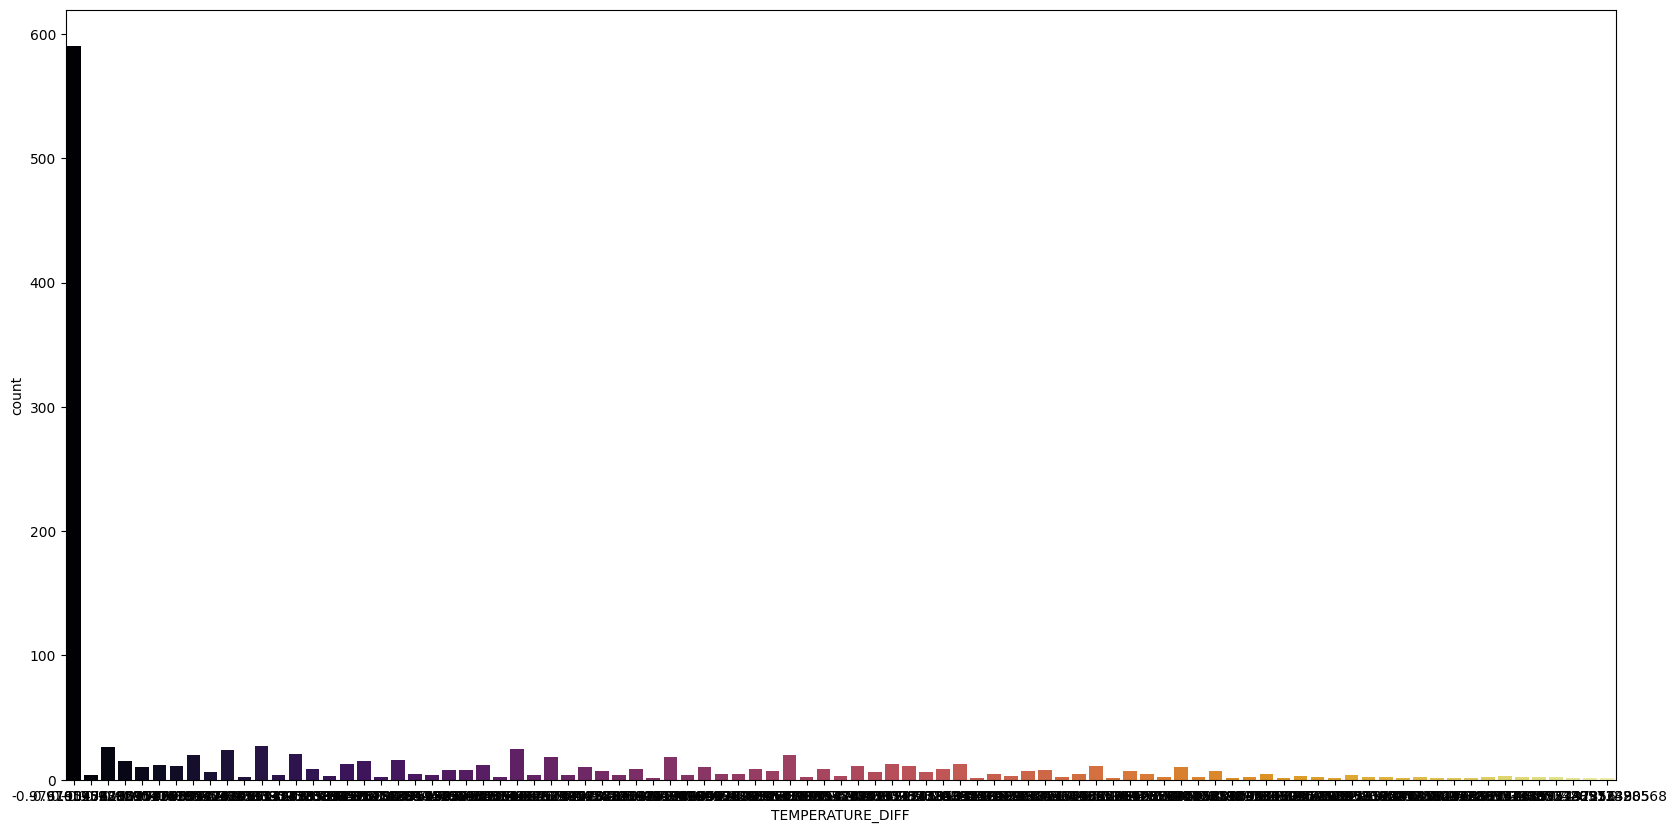

In [ ]:
df['TEMPERATURE_DIFF'].value_counts().head(10)
plot = plt.subplots(figsize=(20, 10))
sns.countplot(x='TEMPERATURE_DIFF', data=df, palette='inferno')

In [ ]:
df

,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,AGE_ABOVE65,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,-1.000000,-1.000000,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,-1.000000,-1.000000,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,-1.000000,-1.000000,1,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,-0.238095,-0.818182,1,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...
1920,-1.000000,-1.000000,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,-1.000000,-1.000000,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,-1.000000,-1.000000,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,-1.000000,-1.000000,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


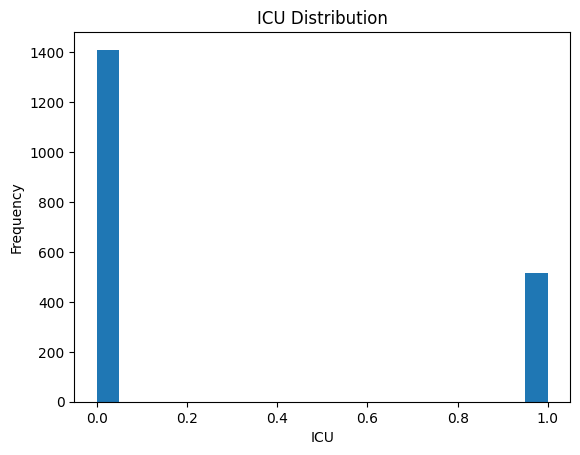

Text(0.5, 24.0, 'TEMPERATURE_DIFF')

In [ ]:
ax = df['ICU'].plot(kind='hist', bins=20, title='ICU Distribution')
plt.xlabel('ICU')
plt.ylabel('Frequency')
plt.show()
ax.set_xlabel('TEMPERATURE_DIFF')

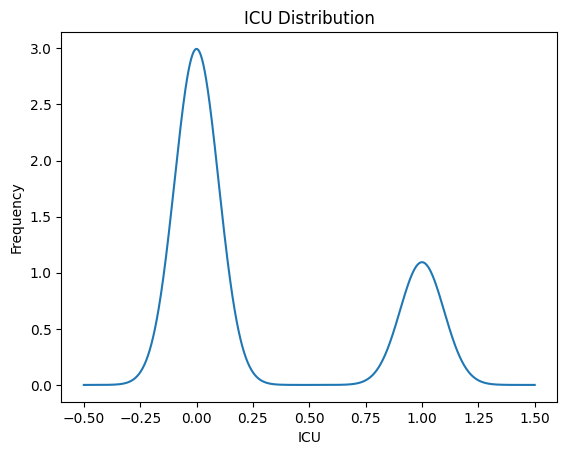

Text(0.5, 24.0, 'TEMPERATURE_DIFF')

In [ ]:
ax = df['ICU'].plot(kind='kde',title='ICU Distribution')
plt.xlabel('ICU')
plt.ylabel('Frequency')
plt.show()
ax.set_xlabel('TEMPERATURE_DIFF')

Step 4: Feature Relationships
    .Scatterplot
    .Heatmap Correlation
    .pairplot
    .Groupby comparisons

Let's compare 2 feature side by side by making a scatter plot

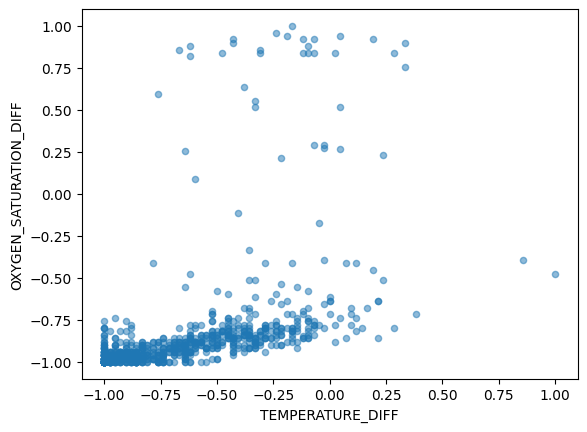

In [ ]:
df.plot(kind='scatter',x='TEMPERATURE_DIFF',y='OXYGEN_SATURATION_DIFF',alpha=0.5)
tittle='TEMPERATURE_DIFF vs OXYGEN_SATURATION_DIFF'

<Axes: xlabel='TEMPERATURE_DIFF', ylabel='OXYGEN_SATURATION_DIFF'>

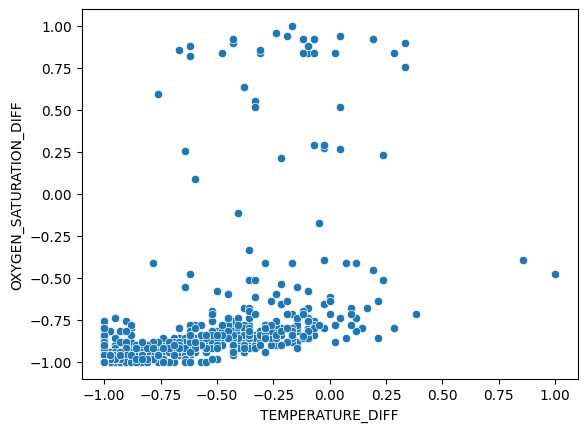

In [ ]:
sns.scatterplot(data=df,x='TEMPERATURE_DIFF',y='OXYGEN_SATURATION_DIFF')

Let's see features we want to campare because with seaborn we can use pairplot to caompare more than 2 features

In [ ]:
df.head()

,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,AGE_ABOVE65,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,-1.000000,-1.000000,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,-1.000000,-1.000000,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,-1.000000,-1.000000,1,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,-0.238095,-0.818182,1,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


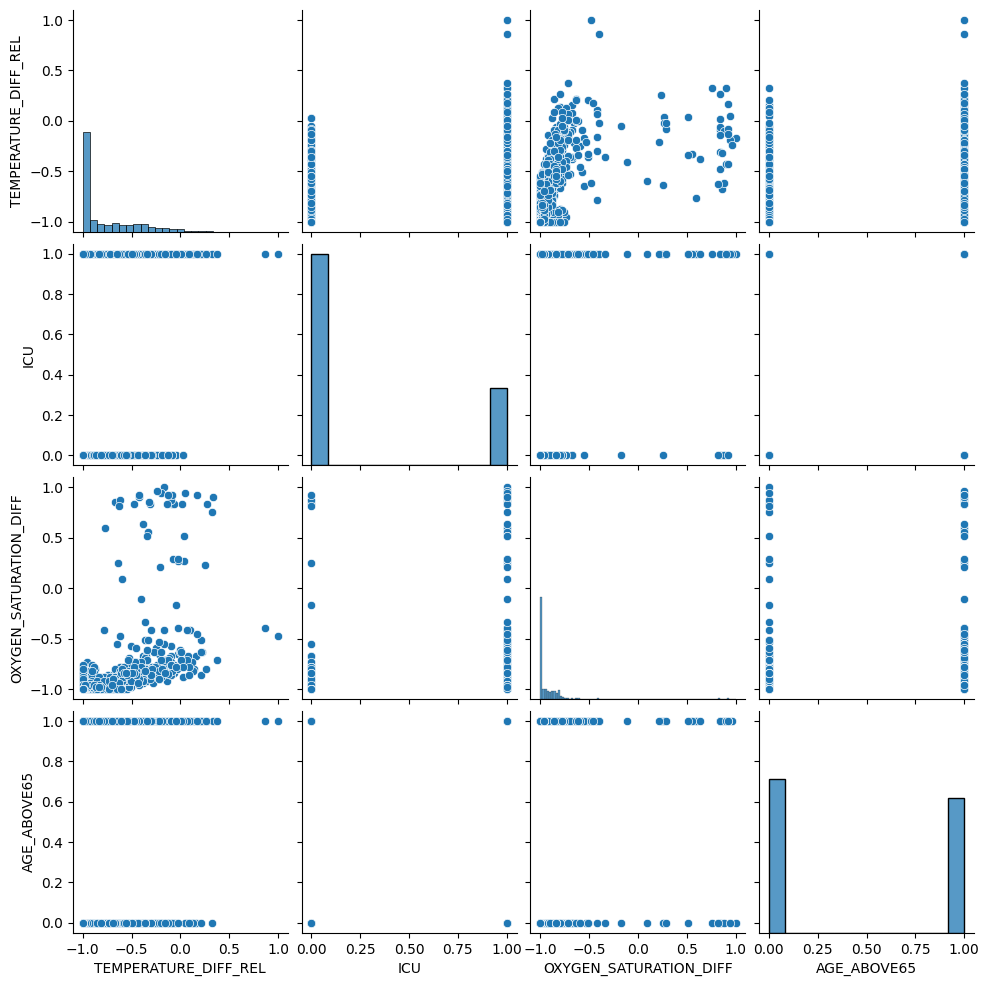

In [ ]:
sns.pairplot(df, vars=['TEMPERATURE_DIFF_REL','ICU','OXYGEN_SATURATION_DIFF','AGE_ABOVE65'])

Let's look the correlations

In [ ]:
df[['TEMPERATURE_DIFF_REL','ICU','OXYGEN_SATURATION_DIFF','AGE_ABOVE65']].corr()

,TEMPERATURE_DIFF_REL,ICU,OXYGEN_SATURATION_DIFF,AGE_ABOVE65
TEMPERATURE_DIFF_REL,1.000000,0.331295,0.546079,0.065154
ICU,0.331295,1.000000,0.259460,0.212198
OXYGEN_SATURATION_DIFF,0.546079,0.259460,1.000000,0.101657
AGE_ABOVE65,0.065154,0.212198,0.101657,1.000000


<Axes: >

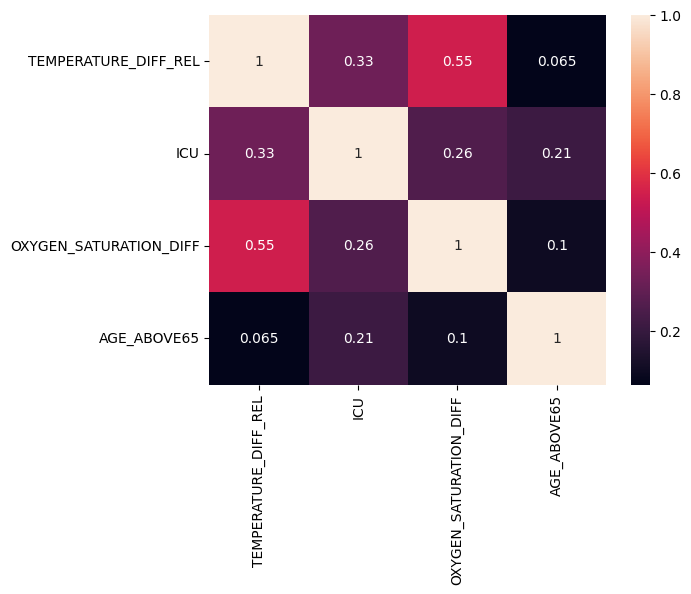

In [ ]:
sns.heatmap(df[['TEMPERATURE_DIFF_REL','ICU','OXYGEN_SATURATION_DIFF','AGE_ABOVE65']].corr(),annot=True)

Step 5: Final step of our EDA wil be asking a question to our Dataset because now we have a good feeling of our Dataset

What are the tempetures that require admission to the ICU (Minimum of 10)?

First we will take care of the NAN values because it will affect our model by by filling them vith 0

In [ ]:
import pandas as pd

df = pd.read_excel('/content/Kaggle_Sirio_Libanes_ICU_Prediction (1).xlsx')  # Replace 'your_data.csv' with the actual file path
df.fillna(value=0, inplace=True) # Modify the dataframe in place, no need to reassign
df.head() # Now you can call .head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


we have to take care of the null values too

In [ ]:
df.isnull().sum()

TEMPERATURE_DIFF                    0
OXYGEN_SATURATION_DIFF              0
AGE_ABOVE65                         0
BLOODPRESSURE_DIASTOLIC_DIFF_REL    0
BLOODPRESSURE_SISTOLIC_DIFF_REL     0
HEART_RATE_DIFF_REL                 0
RESPIRATORY_RATE_DIFF_REL           0
TEMPERATURE_DIFF_REL                0
OXYGEN_SATURATION_DIFF_REL          0
WINDOW                              0
ICU                                 0
dtype: int64

3) Let's develop some  ML models and pick the most promising one. Evaluate it based on a variety of metrics as well as analysing it’s performance (does it overtrain, can we improve it by changing our data preprocessing etc.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification # Import the correct function

x,y = make_classification(n_samples=1000,n_features=20,random_state=42) # Fix the typo

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print("Accuracy score:", rfc.score(X_test, y_test))

Accuracy score: 0.9


LOGISTIC REGRESSION

In [ ]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 78.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
df = df[[
    #'PATIENT_VISIT_IDENTIFIER', 'AGE_PERCENTIL', 'GENDER',
     #  'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
      # 'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6',
       'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF','AGE_ABOVE65',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU']]

In [ ]:
df.head()

,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,AGE_ABOVE65,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,-1.000000,-1.000000,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,-1.000000,-1.000000,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,-1.000000,-1.000000,1,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,-0.238095,-0.818182,1,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [ ]:
import pandas as pd

df
df.fillna(value=0, inplace=True) # Modify the dataframe in place, no need to reassign
df.head() # Now you can call .head()

,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,AGE_ABOVE65,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,-1.000000,-1.000000,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,-1.000000,-1.000000,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0.000000,0.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4-6,0
3,-1.000000,-1.000000,1,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,6-12,0
4,-0.238095,-0.818182,1,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [ ]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler



In [ ]:
# Generate and dataset for Logistic Regression
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)
print(x.shape, y.shape)

(100, 1) (100,)


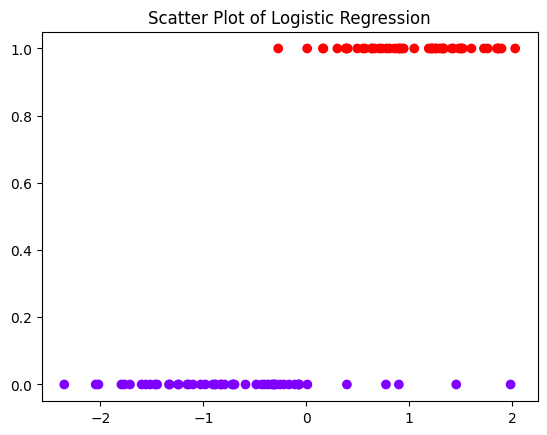

In [ ]:
# Create a scatter plot
plt.scatter(x, y, c=y, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()

In [ ]:
# Split the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [ ]:
X_train.shape

(1540, 10)

In [ ]:
 #Create a Logistic Regression Object, perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [ ]:
# Perform prediction using the test dataset
y_pred = log_reg.predict(x_test)

In [ ]:
# Show the Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[11,  1],
       [ 3, 10]])

Decision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score
import joblib

In [ ]:
#Import and Split Data

# Adjust pandas display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load the original data
data_original = pd.read_excel('/content/Kaggle_Sirio_Libanes_ICU_Prediction (1).xlsx')

# Check if 'PATIENT_ID' exists before dropping
if 'PATIENT_ID' in data_original.columns:
    data_original = data_original.drop(columns=['PATIENT_ID'])
else:
    print("Warning: 'PATIENT_ID' column not found.")

data_train = data_original.iloc[:1295].reset_index(drop=True)
data_test = data_original.iloc[1295:].reset_index(drop=True)

print(data_test.dtypes)
print(data_train.shape, data_test.shape)
display(data_test.head(6))

PATIENT_VISIT_IDENTIFIER              int64
AGE_ABOVE65                           int64
AGE_PERCENTIL                        object
GENDER                                int64
DISEASE GROUPING 1                  float64
DISEASE GROUPING 2                  float64
DISEASE GROUPING 3                  float64
DISEASE GROUPING 4                  float64
DISEASE GROUPING 5                  float64
DISEASE GROUPING 6                  float64
HTN                                 float64
IMMUNOCOMPROMISED                   float64
OTHER                               float64
ALBUMIN_MEDIAN                      float64
ALBUMIN_MEAN                        float64
ALBUMIN_MIN                         float64
ALBUMIN_MAX                         float64
ALBUMIN_DIFF                        float64
BE_ARTERIAL_MEDIAN                  float64
BE_ARTERIAL_MEAN                    float64
BE_ARTERIAL_MIN                     float64
BE_ARTERIAL_MAX                     float64
BE_ARTERIAL_DIFF                

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,259,0,20th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.832461,-0.832461,-0.832461,-0.832461,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.268293,-0.268293,-0.268293,-0.268293,-1.0,-0.93895,-0.93895,-0.93895,-0.93895,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.367347,0.367347,0.367347,0.367347,-1.0,-0.912243,-0.912243,-0.912243,-0.912243,-1.0,

In [ ]:
# Separate features and target
X = data_train.drop(columns=['ICU'])
y = data_train['ICU']

# Split into training/validation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets to ensure correct splitting
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1036, 230), (259, 230), (1036,), (259,))

In [ ]:
preprocessor_original = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X_train.select_dtypes(include=['float64', 'int64']).columns),  # Add imputation for numerical features
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), X_train.select_dtypes(include=['object']).columns)  # Handle unknown categories in the test set
    ])

rf_pipeline_original = Pipeline(steps=[
    ('preprocessor', preprocessor_original),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model on the original data
rf_pipeline_original.fit(X_train, y_train)

y_pred = rf_pipeline_original.predict(X_test)

rf_pipeline_original_accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Correct column dtypes

# Define a function to handle the conversion
def convert_columns_to_int64(df, cols):
    for col in cols:
        df[col] = df[col].fillna(999).astype('Int64').replace(999, pd.NA)
    return df

# Specify the columns to convert
columns_to_convert = data_test.columns[3:12]

# Convert the column dtypes to Int64 for both dataframes
data_test = convert_columns_to_int64(data_test, columns_to_convert)
data_train = convert_columns_to_int64(data_train, columns_to_convert)

# Verify the changes
print(data_test.dtypes)
print(data_train.dtypes)

PATIENT_VISIT_IDENTIFIER              int64
AGE_ABOVE65                           int64
AGE_PERCENTIL                        object
GENDER                                Int64
DISEASE GROUPING 1                    Int64
DISEASE GROUPING 2                    Int64
DISEASE GROUPING 3                    Int64
DISEASE GROUPING 4                    Int64
DISEASE GROUPING 5                    Int64
DISEASE GROUPING 6                    Int64
HTN                                   Int64
IMMUNOCOMPROMISED                     Int64
OTHER                               float64
ALBUMIN_MEDIAN                      float64
ALBUMIN_MEAN                        float64
ALBUMIN_MIN                         float64
ALBUMIN_MAX                         float64
ALBUMIN_DIFF                        float64
BE_ARTERIAL_MEDIAN                  float64
BE_ARTERIAL_MEAN                    float64
BE_ARTERIAL_MIN                     float64
BE_ARTERIAL_MAX                     float64
BE_ARTERIAL_DIFF                

In [ ]:
#Test imputed (filled-in) data with Random forest

#Column Filters
float64_columns = X_train.select_dtypes(include=['float64']).columns
int64_columns = X_train.select_dtypes(include=['int64']).columns
object_columns = X_train.select_dtypes(include=['object']).columns


# Define the preprocessing and modeling pipeline with correct imputation strategies
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))]), float64_columns),
        ('bin', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))]), int64_columns),
        ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                ('encoder', OneHotEncoder(drop='first'))]), object_columns)
    ])

rf_pipeline_base = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
rf_pipeline_base.fit(X_train, y_train)

# Evaluate model
y_pred = rf_pipeline_base.predict(X_test)

rf_pipeline_accuracy = accuracy_score(y_test, y_pred)

In [ ]:
#Tune RandomForest Using Grid Search

#Column Filters
float64_columns = X_train.select_dtypes(include=['float64']).columns
int64_columns = X_train.select_dtypes(include=['int64']).columns
object_columns = X_train.select_dtypes(include=['object']).columns


# Define the preprocessing and modeling pipeline with correct imputation strategies
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))]), float64_columns),
        ('bin', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))]), int64_columns),
        ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                ('encoder', OneHotEncoder(drop='first'))]), object_columns)
    ])

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Initialize Grid Search
rf_gs = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit Grid Search
rf_gs.fit(X_train, y_train)

# Evaluate model
y_pred = rf_gs.predict(X_test)

rf_gs_accuracy = accuracy_score(y_test, y_pred)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
278 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/pyt

In [14]:
#Tune RandomForest Using Random Search

#Column Filters
float64_columns = X_train.select_dtypes(include=['float64']).columns
int64_columns = X_train.select_dtypes(include=['int64']).columns
object_columns = X_train.select_dtypes(include=['object']).columns


# Define the preprocessing and modeling pipeline with correct imputation strategies
preprocessor = ColumnTransformer(
    transformers=[
('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))]), float64_columns),
        ('bin', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))]), int64_columns),
        ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                 ('encoder', OneHotEncoder(drop='first'))]), object_columns)
    ])

# Define the parameter distribution
param_dist = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': randint(2, 11),
    'classifier__min_samples_leaf': randint(1, 11),
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Initialize Random Search
rf_rs = RandomizedSearchCV(estimator=rf_pipeline, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=2)

# Train the model
rf_rs.fit(X_train, y_train)

# Evaluate model
y_pred = rf_rs.predict(X_test)
rf_rs_accuracy = accuracy_score(y_test, y_pred)
('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))]))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/pyth

('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))]))

In [15]:
#Test a Logistic Regression model on the imputed data

#Column Filters
float64_columns = X_train.select_dtypes(include=['float64']).columns
int64_columns = X_train.select_dtypes(include=['int64']).columns
object_columns = X_train.select_dtypes(include=['object']).columns


# Define the preprocessing and modeling pipeline with correct imputation strategies
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))]), float64_columns),
        ('bin', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))]), int64_columns),
        ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                ('encoder', OneHotEncoder(drop='first'))]), object_columns)
    ])

# Define the preprocessing and modeling pipeline for Logistic Regression
logistic_pipeline_base = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Train the Logistic Regression model
logistic_pipeline_base.fit(X_train, y_train)

# Evaluate on final test set
y_pred = logistic_pipeline_base.predict(X_test)

logistic_pipeline_accuracy = accuracy_score(y_test, y_pred)

In [16]:
#Test a Tuned Logistic Regression model on the imputed data

#Column Filters
float64_columns = X_train.select_dtypes(include=['float64']).columns
int64_columns = X_train.select_dtypes(include=['int64']).columns
object_columns = X_train.select_dtypes(include=['object']).columns


# Define the preprocessing and modeling pipeline with correct imputation strategies
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))]), float64_columns),
        ('bin', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))]), int64_columns),
        ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                ('encoder', OneHotEncoder(drop='first'))]), object_columns)
    ])

# Define the parameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__solver': ['liblinear', 'saga', 'lbfgs']
}

# Define the preprocessing and modeling pipeline for Logistic Regression
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=10000))
])

# Initialize Grid Search
lr_gs = GridSearchCV(estimator=logistic_pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit Grid Search
lr_gs.fit(X_train, y_train)

# Evaluate on final test set
y_pred = lr_gs.predict(X_test)

lr_gs_accuracy = accuracy_score(y_test, y_pred)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/pytho

In [17]:
#Test Decision Tree

dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the model
dt_pipeline.fit(X_train, y_train)

# Evaluate model
y_pred = dt_pipeline.predict(X_test)

dt_pipeline_accuracy = accuracy_score(y_test, y_pred)

In [18]:
#Compare all models
print('random forest non-imputed accuracy: ',rf_pipeline_original_accuracy,'\n',
      'random forest imputed accuracy: ',rf_pipeline_accuracy,'\n',
      'random forest grid search accuracy: ',rf_gs_accuracy,'\n',
      'random forest random search accuracy: ',rf_rs_accuracy,'\n',
      'logistic regression accuracy: ',logistic_pipeline_accuracy,'\n',
      'logistic regression grid search accuracy: ',lr_gs_accuracy,'\n',
      'decision tree accuracy: ',dt_pipeline_accuracy)

random forest non-imputed accuracy:  0.888030888030888 
 random forest imputed accuracy:  0.8687258687258688 
 random forest grid search accuracy:  0.8725868725868726 
 random forest random search accuracy:  0.8803088803088803 
 logistic regression accuracy:  0.8571428571428571 
 logistic regression grid search accuracy:  0.8571428571428571 
 decision tree accuracy:  0.7644787644787645


In [19]:
#Test all models on data_test:

X_new = data_test.drop(columns=['ICU'])
y_new = data_test['ICU']

y_new_rf_original = rf_pipeline_original.predict(X_new)
y_new_rf = rf_pipeline_base.predict(X_new)
y_new_rfgs = rf_gs.predict(X_new)
y_new_rfrs = rf_rs.predict(X_new)
y_new_lr = logistic_pipeline_base.predict(X_new)
y_new_lrgs = lr_gs.predict(X_new)
y_new_dt = dt_pipeline.predict(X_new)

accuracy_new_rfo = accuracy_score(y_new, y_new_rf)
accuracy_new_rf = accuracy_score(y_new, y_new_rf)
accuracy_new_rfgs = accuracy_score(y_new, y_new_rfgs)
accuracy_new_rfrs = accuracy_score(y_new, y_new_rfrs)
accuracy_new_lr = accuracy_score(y_new, y_new_lr)
accuracy_new_lrgs = accuracy_score(y_new, y_new_lrgs)
accuracy_new_dt = accuracy_score(y_new, y_new_dt)

print('data_test random forest non-imputed accuracy: ',accuracy_new_rfo,'\n',
      'data_test random forest imputed accuracy: ',accuracy_new_rf,'\n',
      'data_test random forest grid search accuracy: ',accuracy_new_rfgs,'\n',
      'data_test random forest random search accuracy: ',accuracy_new_rfrs,'\n',
      'data_test logistic regression accuracy: ',accuracy_new_lr,'\n',
      'data_test logistic regression grid search accuracy: ',accuracy_new_lrgs,'\n',
      'data_test decision tree accuracy: ',accuracy_new_dt)

data_test random forest non-imputed accuracy:  0.8777777777777778 
 data_test random forest imputed accuracy:  0.8777777777777778 
 data_test random forest grid search accuracy:  0.8841269841269841 
 data_test random forest random search accuracy:  0.8793650793650793 
 data_test logistic regression accuracy:  0.861904761904762 
 data_test logistic regression grid search accuracy:  0.861904761904762 
 data_test decision tree accuracy:  0.7317460317460317
